### Importing Modules

In [1]:
# The Python modules uses in this tutorial are:

# - Pandas
# - Num## Importing Modulespy
# - Matplotlib
# - Seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading dataset with Padndas

In [2]:
df = pd.read_csv('./bank.csv')

# You can also open loans_train.csv with Excel and take a look at it.

### Quick Data expolation

In [3]:
# Print first 5 rows of the dataframe
df.head(5)

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [4]:
# Print last 5 rows of the dataframe
df.tail(5)

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

####  Quick Examination of Numerical Attributes


In [5]:
df.describe()

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

In [6]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

Age is missing 12 values , contact and poutcome "previous campaign outcome" are missing. we cant drop the na data as this will result in losing 771 values out of 2000, which is 38.55% of the data, too high a loss

In [7]:
df.nunique()

age             68
job             11
marital          3
education        3
default          2
balance       1274
housing          2
loan             2
contact          2
day             31
month           12
duration       655
campaign        11
pdays          363
previous        26
poutcome         3
subscribed       2
dtype: int64

/var/folders/vp/85hlljwd6d33h0q04j4l1rt80000gs/T/ipykernel_40086/994635596.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True);


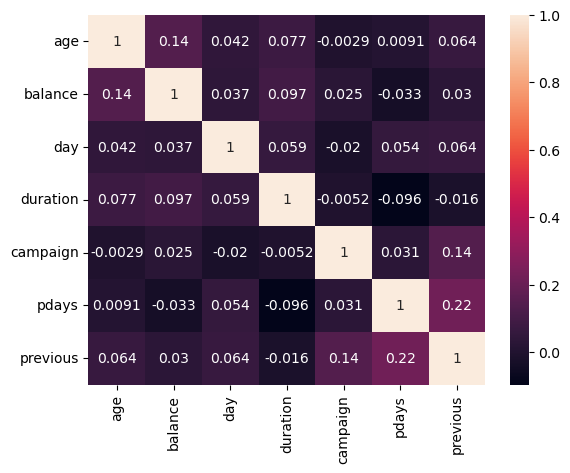

In [8]:
sns.heatmap(df.corr(), annot = True);

The heat map suggests correlation greater than 0 between `pdays` and the five attributes `previous`, `pdays`,`campaign`, `day`, `balance` and `age`. The most significant correlation is between `previous` and `padys` and `campaign`. There were higher contacts perfromed for the same client that has been contacted from a previous campaign < 400 dyas ago. Also the data shows that customer with balance < 20K had more contacts "0 balance had the highest number of contacts". hihest contact were for customer between 20-40 of age. **This is inconclusive as no strong correlations whatsoever**


In [9]:
print(df[['previous','pdays','campaign']])

      previous  pdays  campaign
0            2    131         2
1            1    133         2
2            1    239         2
3            2    238         1
4            1    307         1
...        ...    ...       ...
1995         0     -1         2
1996         0     -1         2
1997         0     -1         1
1998         0     -1         1
1999         0     -1         2

[2000 rows x 3 columns]


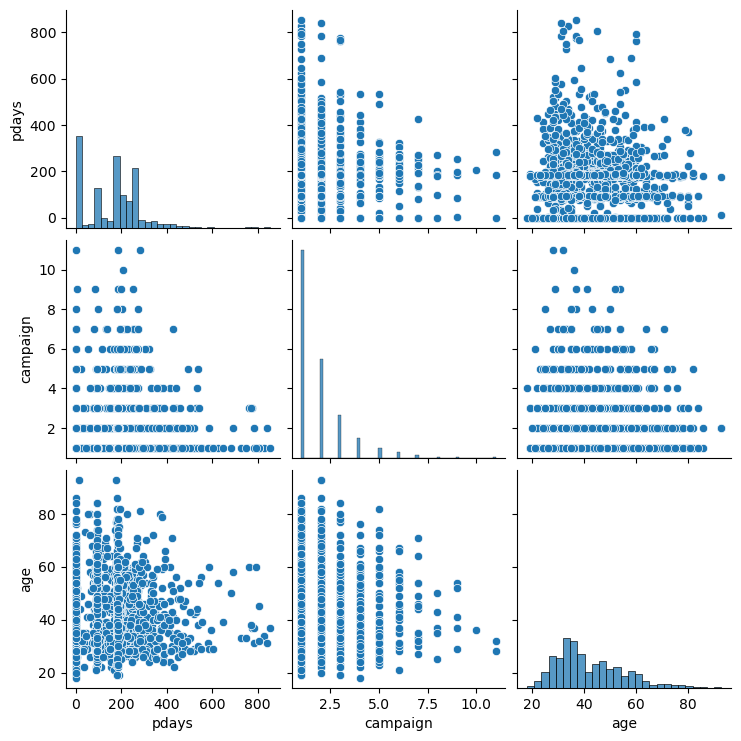

In [31]:
# note that by applying the method dropna() we drop all rows with missing values 
sns.pairplot(data=df[['pdays','campaign','age']])
plt.show()

#,'campaign','day','age'

In [11]:
df[['subscribed']].value_counts()

subscribed
no            1000
yes           1000
dtype: int64

Data is split in half between subscribed and unscribed suggesting 50% success rate

In [12]:
df[['subscribed','housing','loan']].value_counts()

subscribed  housing  loan
yes         no       no      771
no          yes      no      607
            no       no      186
yes         yes      no      186
no          yes      yes     153
            no       yes      54
yes         no       yes      26
            yes      yes      17
dtype: int64

In [13]:
print(f'% Total subscribed customers: 50%')
print(f'% Total subscribed customers with loan: {((26+17)/2000)*100}%')
print(f'% Total subscribed customers with housing: {((186+17)/2000)*100}%')
print(f'% Total subscribed customers with loan & housing: {((17)/2000)*100:.2f}%')

print(f'========================================================================')

print(f'% Total subscribed customers without loan: {((771+186)/2000)*100}%')
print(f'% Total subscribed customers without housing: {((186+17)/2000)*100}%')
print(f'% Total subscribed customers without loan & housing: {((771)/2000)*100:.2f}%')

% Total subscribed customers: 50%
% Total subscribed customers with loan: 2.15%
% Total subscribed customers with housing: 10.15%
% Total subscribed customers with loan & housing: 0.85%
% Total subscribed customers without loan: 47.85%
% Total subscribed customers without housing: 10.15%
% Total subscribed customers without loan & housing: 38.55%


This suggests that customers **without loan** and customers **without loan and housing** had the highest success rate

In [14]:
df.dtypes

age           float64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day             int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
subscribed     object
dtype: object

### Useful hints
Types of Data
- Categorical
    - Nominal : values represent discrete unit - changing order does not change the value 'marital' 'subscribed'
    - Ordinal 
to illustate Bar Chart / Pie Chart

- Continious  "numerical"
    - Interval: none 
    - Ratio : values that have absolute 0 
        
- Histogram
- Boxplot

#### Features: 
16  Both categorical and numerical.

#### Dataset 
2000 targeted customers records.

#### Outcomes: 
1.  subscribed Binary [yes/no].  The subscribed attribute says whether the client subscribed to a credit deposit or not following this marketing campaign and following a call.


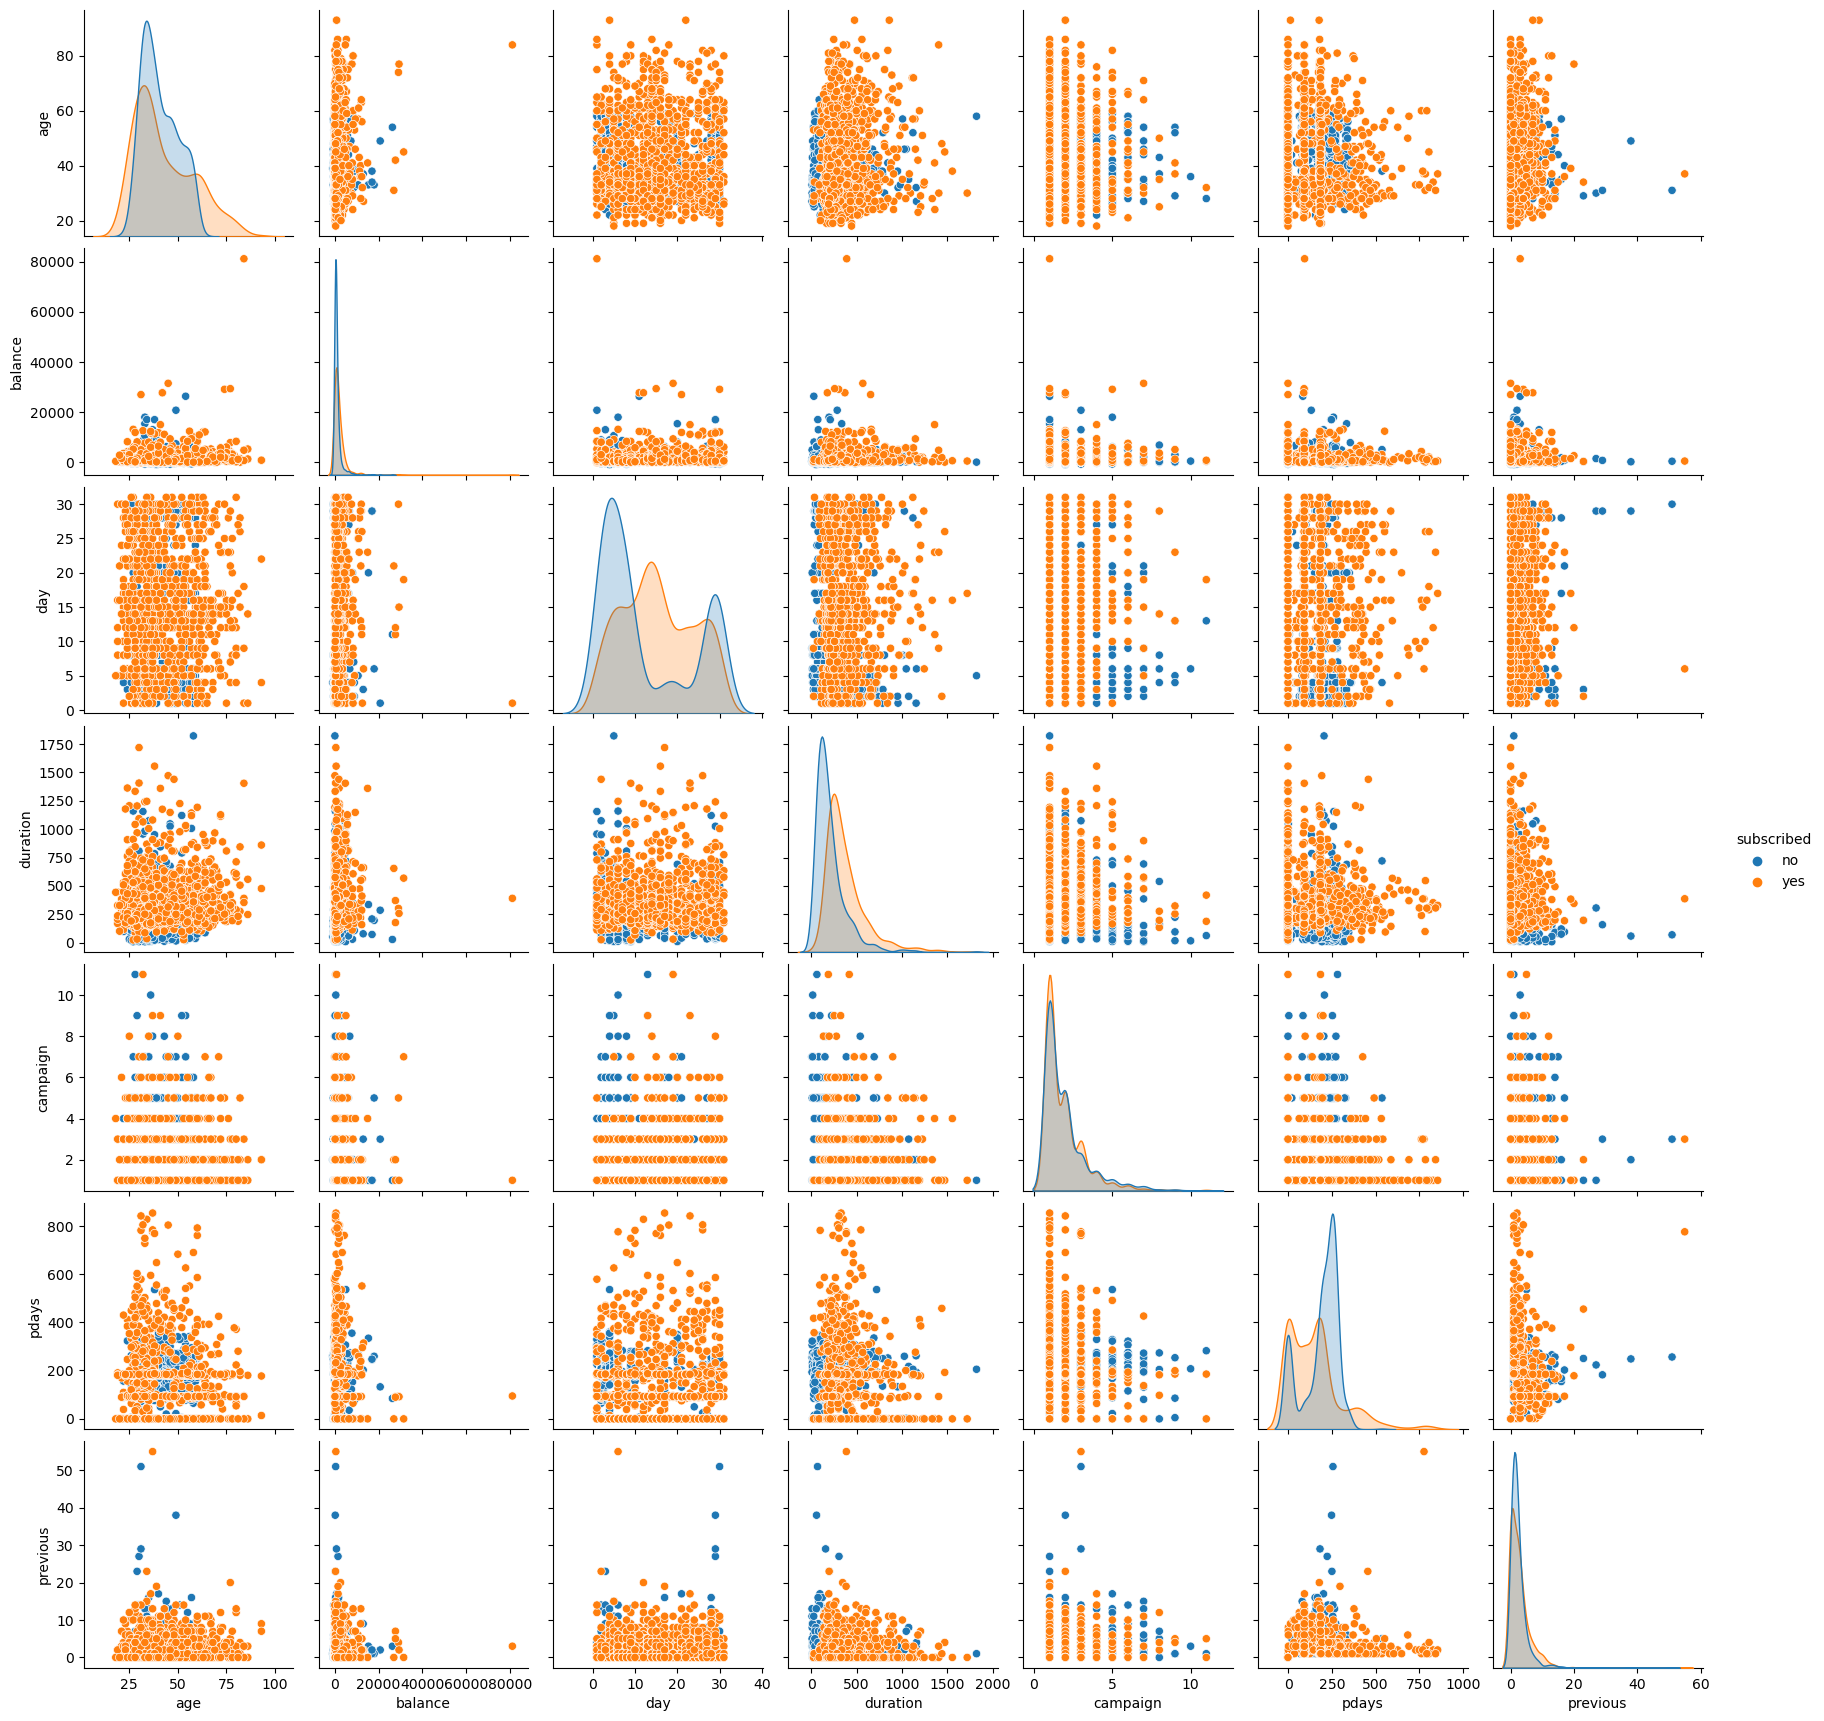

In [30]:
# note that by applying the method dropna() we drop all rows with missing values 
#sns.pairplot(data=df[['campaign','pdays','previous', 'day', 'balance' , 'age']].dropna(),hue='subscribed')
sns.pairplot(data=df,hue='subscribed')

plt.show()

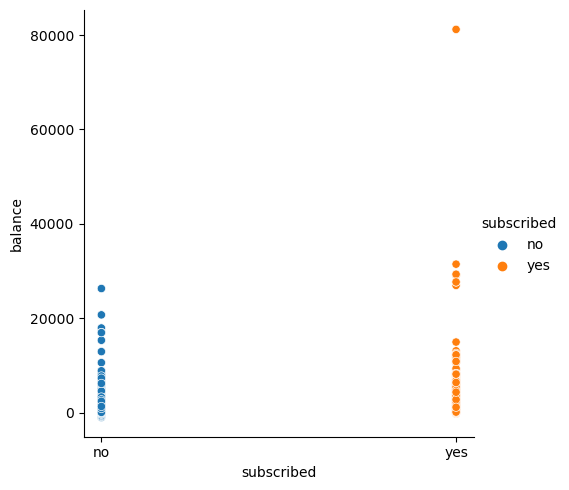

In [16]:
sns.relplot(data=df,x='subscribed', y='balance', hue = 'subscribed')


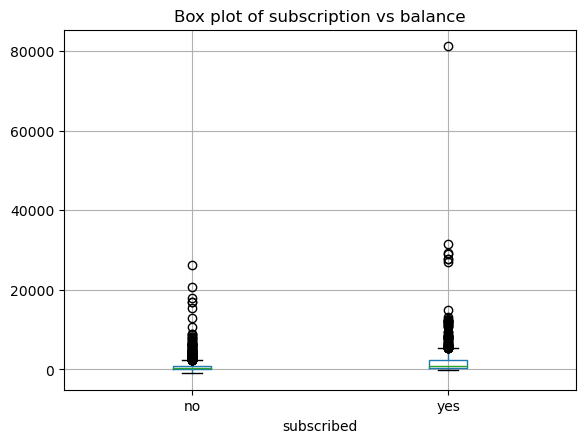

In [17]:
#subscptions = df[['subscribed','housing','loan']]
#subscptions = df[['subscribed','housing','loan','age']]

# Boxp lots of ApplicantIncome, grouped by the categorical attribute Education
df.boxplot(column='balance', by='subscribed')
plt.title('Box plot of subscription vs balance')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

**campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)

**pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

**previous:** number of contacts performed before this campaign and for this client (numeric)


In [18]:
#q = df["balance"].quantile(0.99)

In [19]:
df['age'].value_counts()

33.0    95
35.0    90
31.0    87
34.0    84
32.0    77
        ..
86.0     2
73.0     2
81.0     2
79.0     1
18.0     1
Name: age, Length: 68, dtype: int64

array([[<Axes: title={'center': 'campaign'}>]], dtype=object)

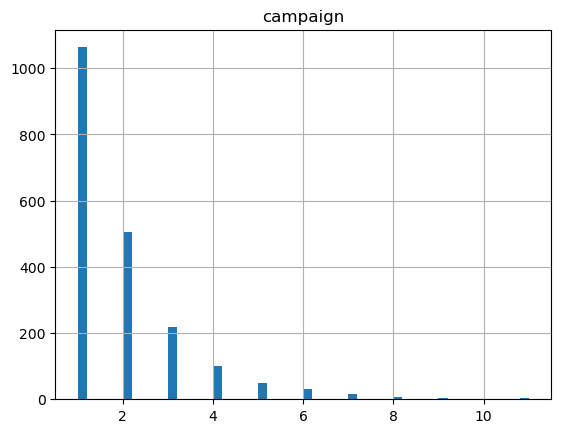

In [20]:
df[['campaign']].hist(bins=50)

#### B.2. Quick Examination of Categorical Attributes

**Categorical variables:**

job  
marital        
education      
default        
housing        
loan           
contact        
month          
poutcome

In [21]:
df[['job','marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']].value_counts()

job          marital  education  default  housing  loan  contact   month  poutcome
technician   married  secondary  no       yes      no    cellular  feb    failure     24
blue-collar  married  secondary  no       yes      no    cellular  feb    failure     22
management   married  tertiary   no       yes      no    cellular  feb    failure     17
services     married  secondary  no       yes      no    cellular  feb    failure     14
blue-collar  married  primary    no       yes      no    cellular  feb    failure     13
                                                                                      ..
management   married  secondary  no       no       no    cellular  may    success      1
                                                                   oct    failure      1
                                                                   sep    other        1
                                                                          success      1
unemployed   single   terti

In [22]:
c_params = ['job','marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

for c in c_params:
    print("===================")
    print(df[[c]].value_counts())    
    print(f'\n{2000 - df[[c]].value_counts().sum()} missing values' )



job          
management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
dtype: int64

10 missing values
marital 
married     1111
single       674
divorced     215
dtype: int64

0 missing values
education
secondary    995
tertiary     684
primary      217
dtype: int64

104 missing values
default
no         1985
yes          15
dtype: int64

0 missing values
housing
no         1037
yes         963
dtype: int64

0 missing values
loan
no      1750
yes      250
dtype: int64

0 missing values
contact  
cellular     1663
telephone     146
dtype: int64

191 missing values
month
feb      404
may      333
jan      245
apr      205
jul      167
aug      136
sep      134
jun      104
oct       93
mar       70
nov       68
dec       41
dtype: int64

0 missing values
poutcome
failure     955
success     444
other       147
dtype

poutcome has 22.7% missing values , hence this feature is not reliable to be used for prediction. second placce is contact, even if it is < 10% , yet too much to be reliabel 

### C. Distribution Analysis for Numerical Atributes


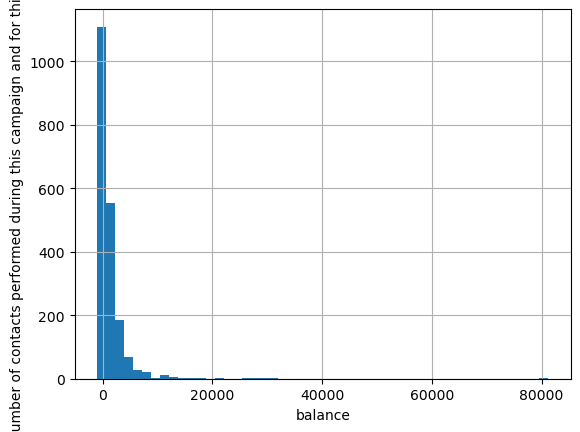

In [23]:
df['balance'].hist(bins=50)
plt.xlabel('balance')
plt.ylabel('number of contacts performed during this campaign and for this client')
plt.show()

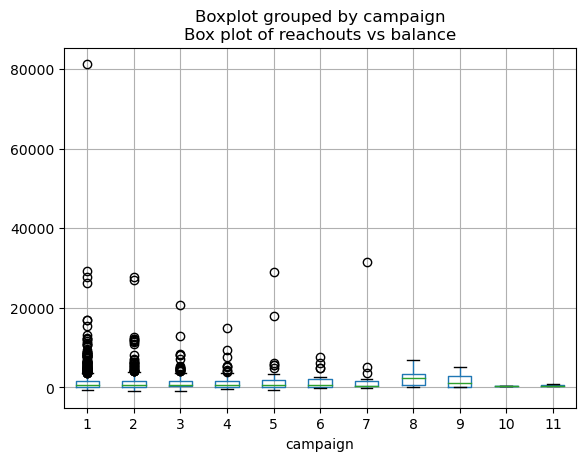

In [24]:
df.boxplot(column='balance', by='campaign')
plt.title('Box plot of reachouts vs balance')
plt.show()

most data points falls into the oulier category

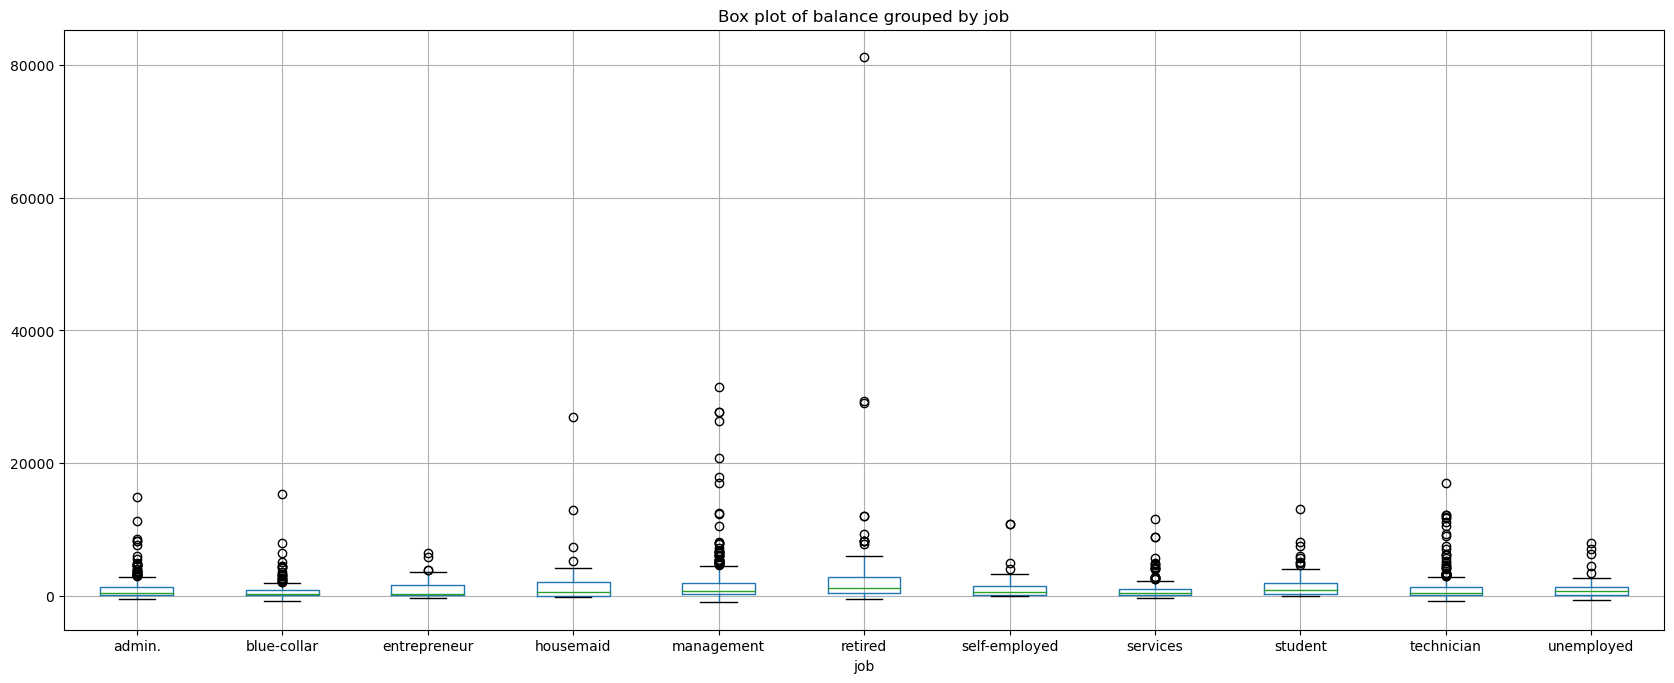

In [25]:
# Boxp lots of blanace, grouped by the categorical attribute job
df.boxplot(column='balance', by='job',figsize = (20,8))
plt.title('Box plot of balance grouped by job')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

sperating by job and balance all data seem to fall in the max outlier category

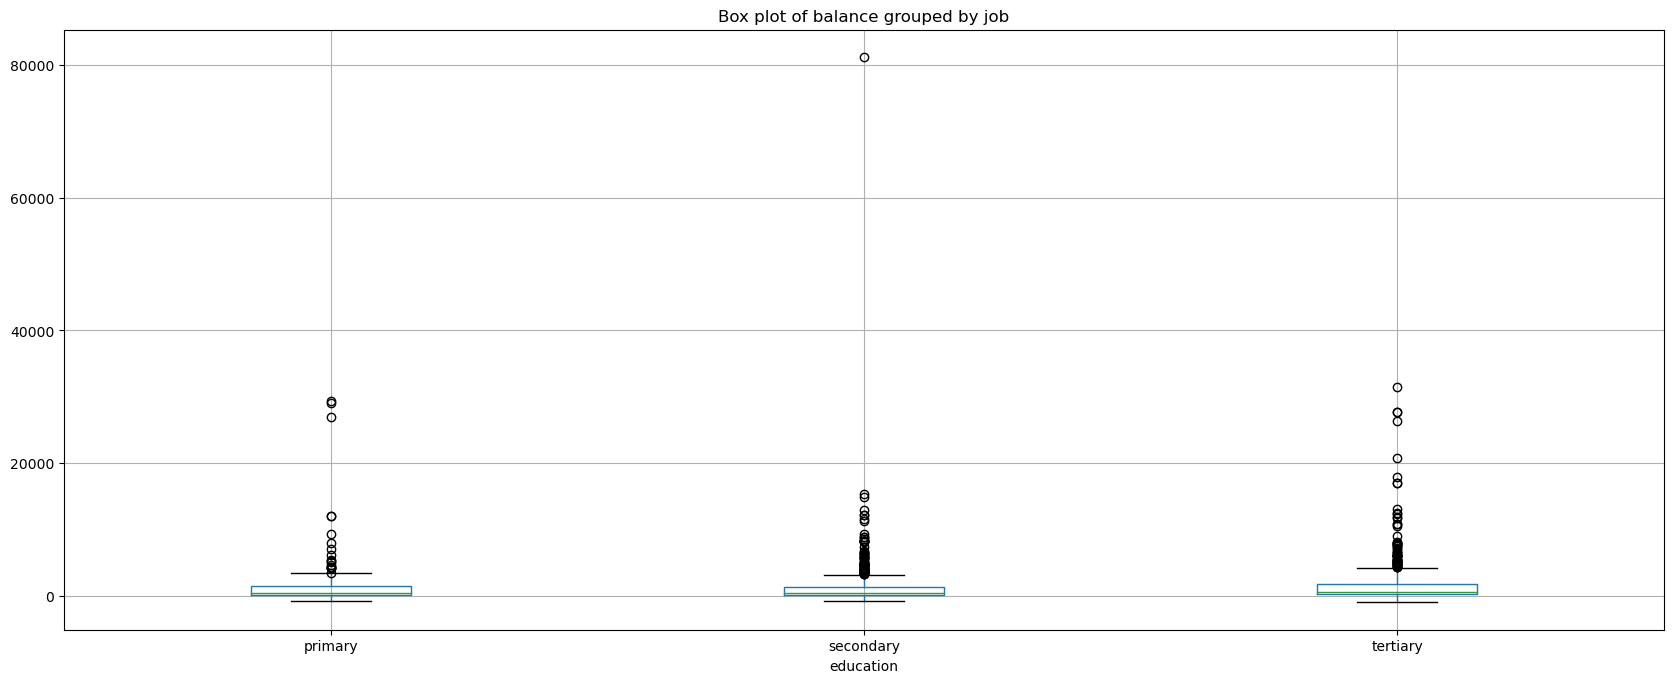

In [26]:
# Boxp lots of ApplicantIncome, grouped by the categorical attribute Education
df.boxplot(column='balance', by='education',figsize = (20,8))
plt.title('Box plot of balance grouped by job')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

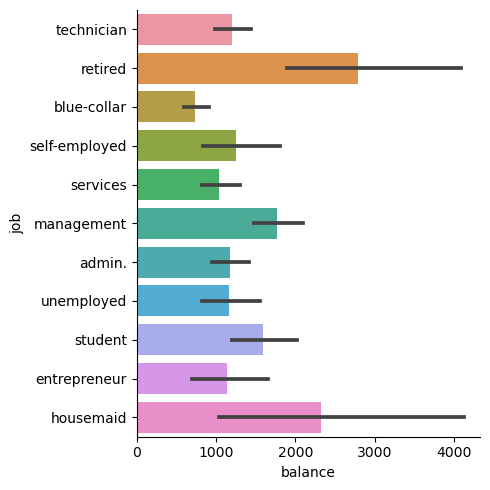

In [27]:
# .hist(bins=30)


# plt.xlabel('job')
# plt.ylabel('campaign')
# plt.show()

sns.catplot(data=df[['job','balance']], y="job", x="balance", kind="bar")


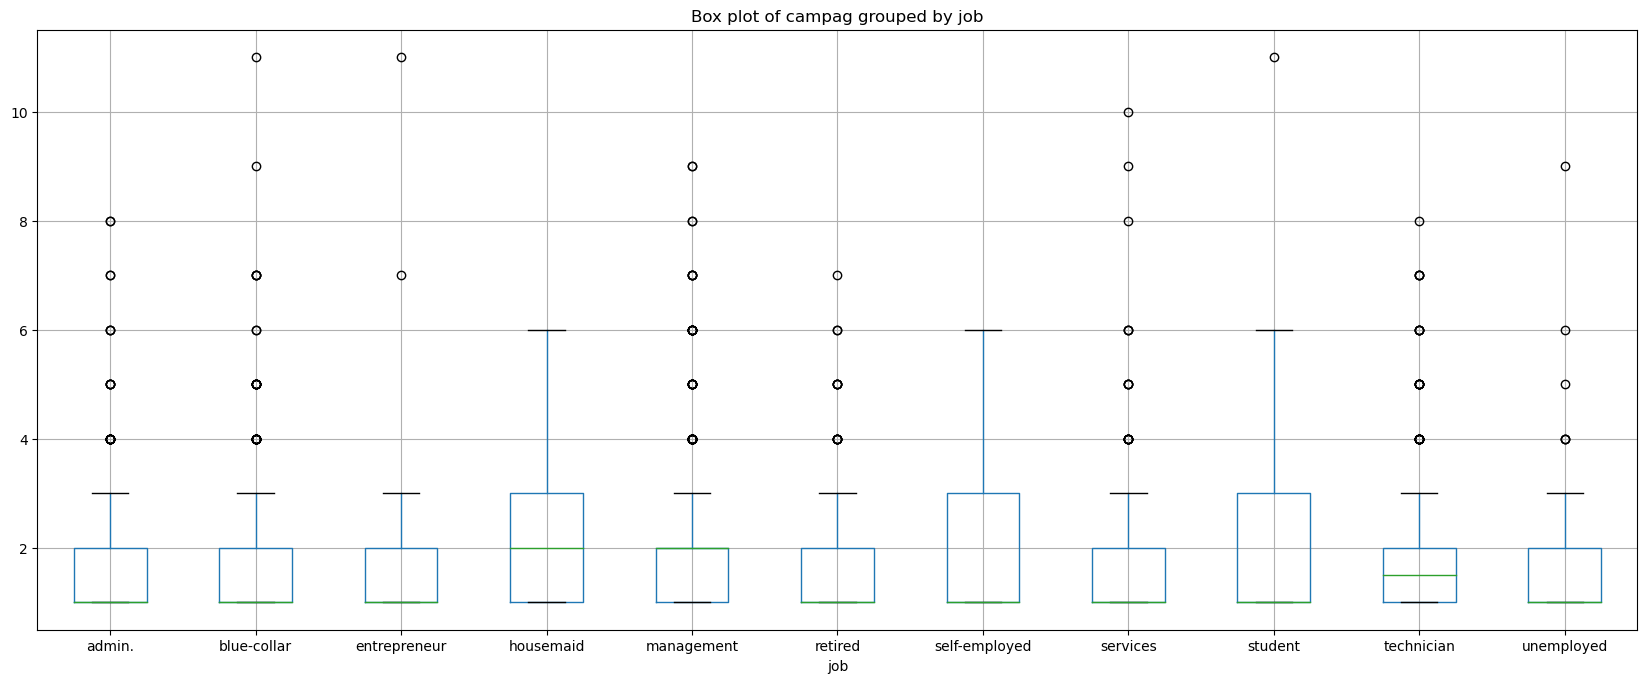

In [28]:
# Boxp lots of ApplicantIncome, grouped by the categorical attribute Education
df.boxplot(column='campaign', by='job',figsize = (20,8))
plt.title('Box plot of campag grouped by job')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

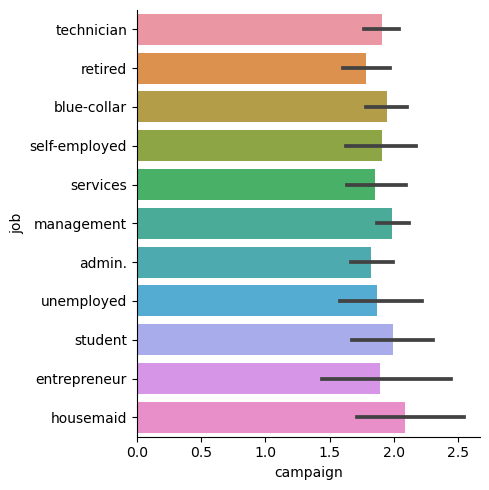

In [29]:
sns.catplot(data=df[['job','campaign']], y="job", x="campaign", kind="bar")
